# Project- Stroke prediction

This project has been proposed by Hanna Abi Akl in the context of Python Machine Learning lab course at Data ScienceTech Institute

According to the World Health Organisation (WHO), stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
The dataset provided is used to predict whether a patient is likely to get a stroke based on input parameters like gender, age, various diseases and smoking status.

## Dataset description
Below is the information you have regarding the dataset attributes:
1) id: unique patient identifier
2) gender: “Male”, “Female” or “Other”
3) age: age of the patient
4) hypertension: 0 (if the patient doesn’t have hypertension) or 1 (if the patient has hypertension)
5) heart_disease: 0 (if the patient doesn’t have a heart disease) or 1 (if the patient has a heart disease)
6) ever_married: “No” or “Yes”
7) work_type: “children”, “Govt_job”, “Never_worked”, “Private” or “Self-employed”
8) Residence_type: “Rural” or “Urban”
9) avg_glucose_level: average glucose level in the blood
10) bmi: body mass index
11) smoking_status: “formerly smoked”, “never smoked”, “smokes” or “Unknown” (in this case the information for the patient is not available)
12) stroke: 1 (if the patient had a stroke) or 0 (if the patient didn’t have a stroke)

In [375]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import data

In [376]:
df = pd.read_csv("C:/Users/salis/Desktop/Python_Hanna/Project/stroke_data.csv",sep=",",index_col="id")

In [377]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1


In [378]:
df.tail(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Description and cleaning of the dataset

In [379]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


##### 1) Looking at NaN values

In [380]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

##### 1) Gender variable

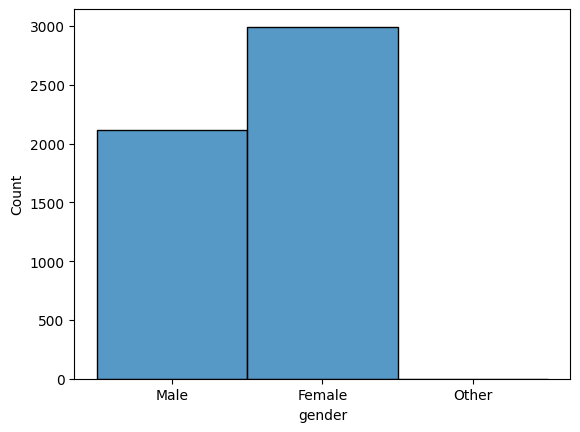

In [381]:
sns.histplot(df["gender"])
plt.show()

In [382]:
df = df.drop(index=df[df.gender == "Other"].index)

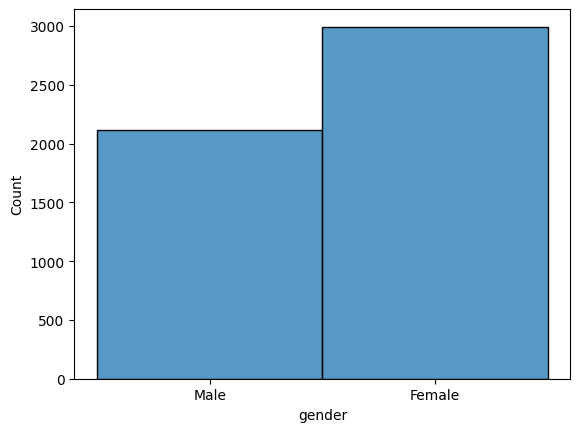

In [384]:
sns.histplot(df["gender"])
plt.show()

##### 2) bmi variable

'bmi' has 201 missing values. So, let's fill these data using the mean

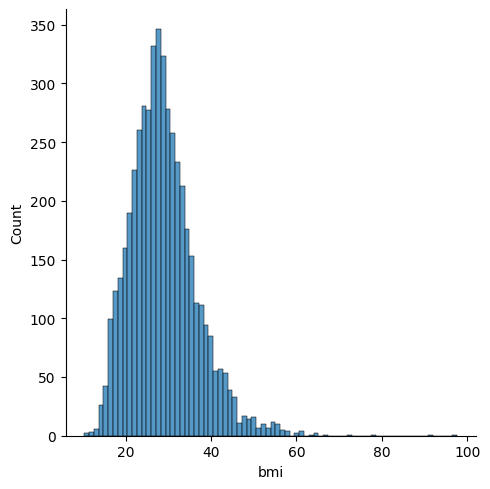

In [385]:
sns.displot(df.bmi)

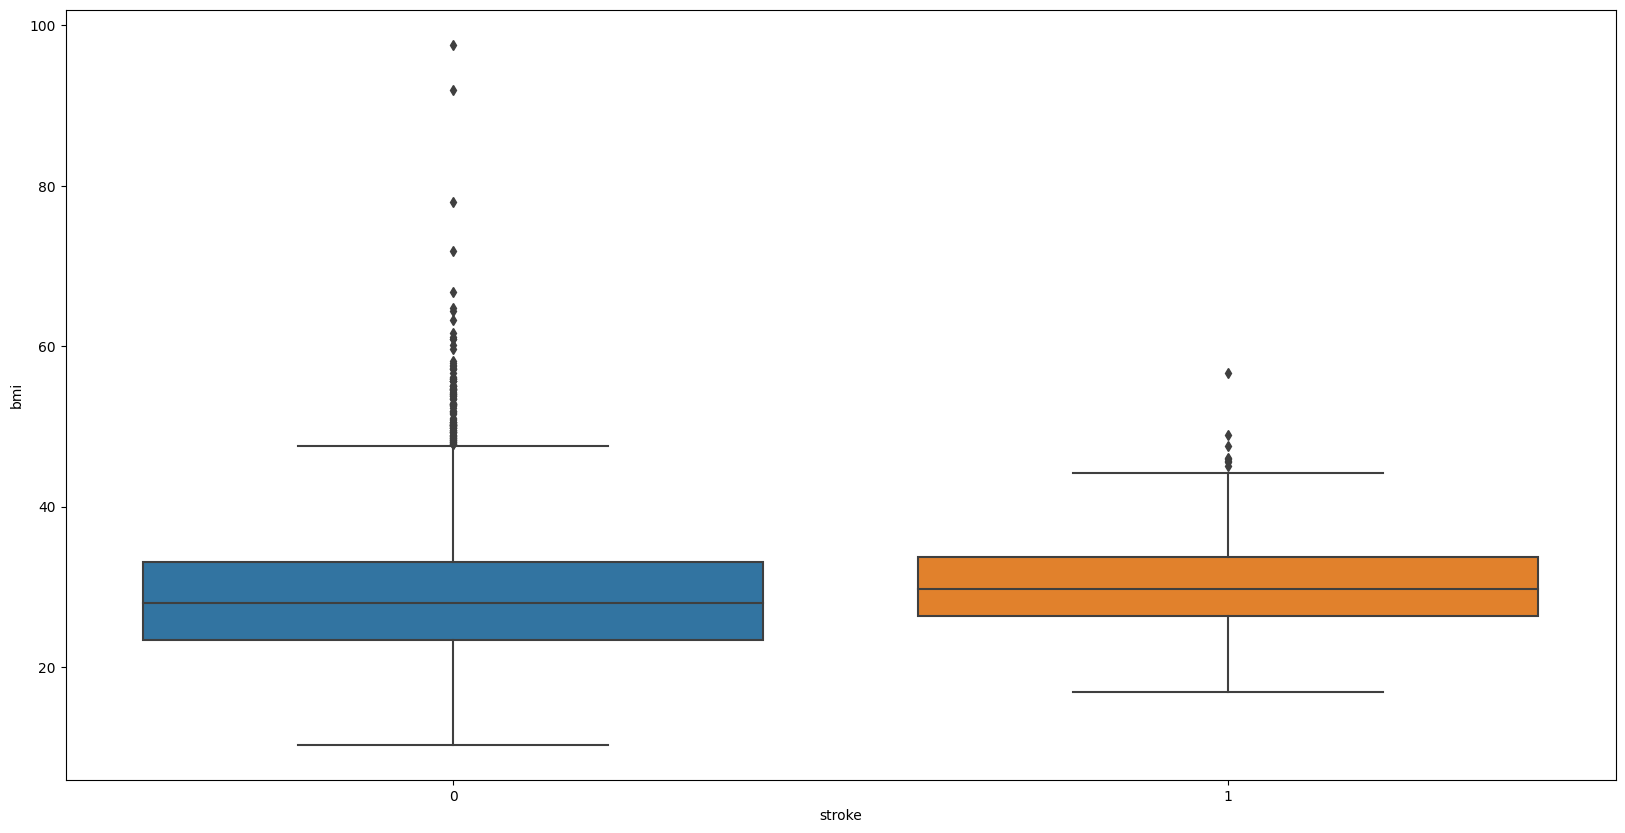

In [386]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.stroke,y=df.bmi)
plt.show()

In [387]:
df.groupby(["gender"]).mean().bmi

gender
Female    29.065758
Male      28.647936
Name: bmi, dtype: float64

bmi is different between 'Male' and 'Female'. Let's fill the missing values with mean values of bmi depending on the gender.

In [388]:
average_bmi = df.groupby(["gender"]).mean().bmi.astype(float).to_dict()

In [389]:
average_bmi.keys()

dict_keys(['Female', 'Male'])

In [390]:
average_bmi[("Female")]

29.065757680358992

In [391]:
average_bmi[("Male")]

28.64793635007459

In [392]:
def bmi_guesser(Agender):
    bmi = average_bmi[Agender]
    return bmi

In [393]:
bmi_guesser("Female")

29.065757680358992

In [394]:
bmi_guesser("Male")

28.64793635007459

In [395]:
print("State of missing values before processing")
print(df.bmi.isna().sum())
for Vgender in average_bmi.keys():
    df.loc[(df.gender==Vgender) ,"bmi"] = (
        df.loc[(df.gender==Vgender) ,"bmi"].fillna(bmi_guesser(Vgender))
    )
print("State of missing values after processing")
print(df.bmi.isna().sum())

State of missing values before processing
201
State of missing values after processing
0


In [396]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

##### 3) Smoking variable

In [397]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

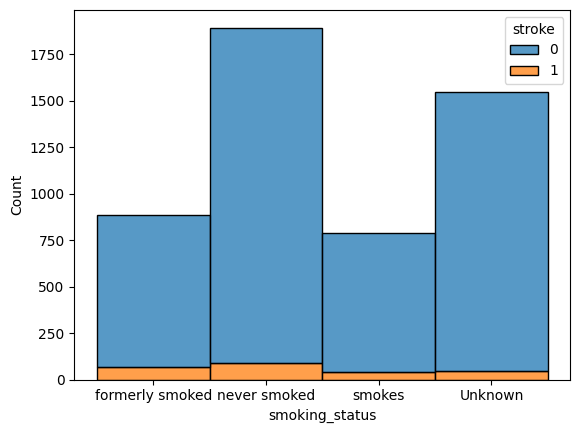

In [398]:
sns.histplot(x="smoking_status",hue="stroke",multiple="stack",data=df)
plt.show()

#####  4) ever_married

In [399]:
df.ever_married.value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

#####  5) work_type

In [400]:
df.work_type.value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

#####  6) Residence_type

In [401]:
df.Residence_type.value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

### Feature ingineering

#### Transform categorical data to numbers using get_dummies

In [402]:
df_processed = df

In [357]:
df_processed

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,29.065758,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


In [403]:
# transformation of "gender" column from ['Male', 'Female'] to [0,1]
df_processed.loc[:,["gender"]] = pd.get_dummies(df.gender,drop_first=True).values

In [404]:
# transformation of "Residence_type" column from ['Urban', 'Rural'] to  [0,1]
df_processed.loc[:,["Residence_type"]] = pd.get_dummies(df_processed.Residence_type,drop_first=True).values

In [405]:
# transformation of "ever_married" column from ['Yes', 'No'] to  [0,1]
df_processed.loc[:,["ever_married"]] = pd.get_dummies(df_processed.ever_married,drop_first=True).values

In [406]:
df_processed

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
51676,0,61.0,0,0,1,Self-employed,0,202.21,29.065758,never smoked,1
31112,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
60182,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
1665,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,0,80.0,1,0,1,Private,1,83.75,29.065758,never smoked,0
44873,0,81.0,0,0,1,Self-employed,1,125.20,40.000000,never smoked,0
19723,0,35.0,0,0,1,Self-employed,0,82.99,30.600000,never smoked,0


In [407]:
# ENCODING of "work_type"
# transformation of "work_type" column from ['Private', 'Self_employed', 'children', etc.] to  [0,1,2, etc.]
# and transformation of this column into 4 columns corresponding to each of its values
df_processed_b = pd.concat([df_processed,pd.get_dummies(df_processed.work_type)],axis=1).drop(columns="work_type")

In [408]:
df_processed_b.head(10)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Never_worked,Private,Self-employed,children
id,,,,,,,,,,,,,,,
9046,1,67.0,0,1,1,1,228.69,36.600000,formerly smoked,1,0,0,1,0,0
51676,0,61.0,0,0,1,0,202.21,29.065758,never smoked,1,0,0,0,1,0
31112,1,80.0,0,1,1,0,105.92,32.500000,never smoked,1,0,0,1,0,0
60182,0,49.0,0,0,1,1,171.23,34.400000,smokes,1,0,0,1,0,0
1665,0,79.0,1,0,1,0,174.12,24.000000,never smoked,1,0,0,0,1,0
56669,1,81.0,0,0,1,1,186.21,29.000000,formerly smoked,1,0,0,1,0,0
53882,1,74.0,1,1,1,0,70.09,27.400000,never smoked,1,0,0,1,0,0
10434,0,69.0,0,0,0,1,94.39,22.800000,never smoked,1,0,0,1,0,0
27419,0,59.0,0,0,1,0,76.15,29.065758,Unknown,1,0,0,1,0,0


In [409]:
# ENCODING
# Transformation of "smoking_status" column from ['formerly smoked', 'never_smoked', smokes', 'unknown'] to  [0,1,2,3] 
# and transformation of this column into 4 columns corresponding to each of its values
df_processed_c = pd.concat([df_processed_b,pd.get_dummies(df_processed_b.smoking_status)],axis=1).drop(columns="smoking_status")

In [410]:
df_processed_c.head(10)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
id,,,,,,,,,,,,,,,,,,
9046,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
51676,0,61.0,0,0,1,0,202.21,29.065758,1,0,0,0,1,0,0,0,1,0
31112,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
60182,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,0,0,0,1
1665,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,0,0,1,0
56669,1,81.0,0,0,1,1,186.21,29.000000,1,0,0,1,0,0,0,1,0,0
53882,1,74.0,1,1,1,0,70.09,27.400000,1,0,0,1,0,0,0,0,1,0
10434,0,69.0,0,0,0,1,94.39,22.800000,1,0,0,1,0,0,0,0,1,0
27419,0,59.0,0,0,1,0,76.15,29.065758,1,0,0,1,0,0,1,0,0,0


Conclusion: Transformation of dataset is now done

#### Balancing 'stroke' data using SMOTE oversampling

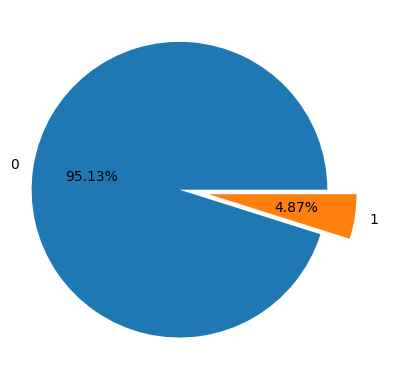

In [411]:
plt.pie(df.stroke.value_counts(),labels=df.stroke.value_counts().index,autopct='%1.2f%%',explode=[0.2,0])
plt.show()

Here, "1" value is represented by less than 5% of the dataset. I.E that this variable is umbalanced. 
Let's use SMOTE oversampling technique to balance the data.

In [412]:
from imblearn.over_sampling import SMOTE

In [413]:
smote = SMOTE()
a = df_processed_c.iloc[:,:-10]
b = df_processed_c.iloc[:,-10]

In [414]:
a

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
id,,,,,,,,
9046,1,67.0,0,1,1,1,228.69,36.600000
51676,0,61.0,0,0,1,0,202.21,29.065758
31112,1,80.0,0,1,1,0,105.92,32.500000
60182,0,49.0,0,0,1,1,171.23,34.400000
1665,0,79.0,1,0,1,0,174.12,24.000000
...,...,...,...,...,...,...,...,...
18234,0,80.0,1,0,1,1,83.75,29.065758
44873,0,81.0,0,0,1,1,125.20,40.000000
19723,0,35.0,0,0,1,0,82.99,30.600000


In [415]:
b

id
9046     1
51676    1
31112    1
60182    1
1665     1
        ..
18234    0
44873    0
19723    0
37544    0
44679    0
Name: stroke, Length: 5109, dtype: int64

In [417]:
X_smote, Y_smote = smote.fit_resample(a, b)

In [419]:
Y_smote.value_counts()

1    4860
0    4860
Name: stroke, dtype: int64

### Split of the dataset into train and test dataset

In [420]:
from sklearn.model_selection import train_test_split

In [421]:
X_train, X_test, Y_train, Y_test  = train_test_split(X_smote, Y_smote, stratify= Y_smote,test_size = 0.2)

In [422]:
len(X_train)

7776

In [423]:
len(Y_train)

7776

In [424]:
len(X_test)

1944

In [425]:
len(Y_test)

1944

Let's check whether the mean of 'stroke' is highly different between the two datasets (train and test)

In [428]:
print(Y_smote.mean())
print(Y_train.mean())
print(Y_test.mean())

0.5
0.5
0.5


Let's do the same for example for bmi

In [429]:
print(X_smote.bmi.mean())
print(X_train.bmi.mean())
print(X_test.bmi.mean())

29.479508971916957
29.468193185288357
29.52477211843134


Mean values are very similar (we did not perform any test here, but normally, should be more accurate)

Conclusion: dataset is now good for modeling

### Machine learning

Here we are in a case of the output in under the form of category. So non-linear model with supervised learning method.
https://scikit-learn.org/stable/user_guide.html

#### 1) Logistic regression

In [431]:
from sklearn.linear_model import LogisticRegression

In [432]:
lr_model = LogisticRegression(random_state=0,max_iter=1000)

In [433]:
lr_model.fit(X=X_train, y=Y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [434]:
Y_test_predicted = lr_model.predict(X_test)

In [435]:
from sklearn.metrics import classification_report

In [436]:
report =classification_report(y_true=Y_test, y_pred=Y_test_predicted)

In [437]:
print(report)

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       972
           1       0.79      0.80      0.80       972

    accuracy                           0.80      1944
   macro avg       0.80      0.80      0.80      1944
weighted avg       0.80      0.80      0.80      1944



Conclusion: f1-score is very good, but let's try random forest

#### 2) Random forest

In [438]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [439]:
rf_model.fit(X=X_train,y=Y_train)

RandomForestClassifier()

In [440]:
y_test_predicted_rf = rf_model.predict(X_test)

In [441]:
report_rf = classification_report(y_pred=y_test_predicted_rf,y_true=Y_test)

In [442]:
print("Report of logistic regression")

print(report_rf)

Report of logistic regression
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       972
           1       0.91      0.94      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944



Conclusion: Random forest is better than logistic regression

#### 3) Multi-Layer Perceptron

In [443]:
from sklearn.neural_network import MLPClassifier

In [501]:
nn_model = MLPClassifier(hidden_layer_sizes=(40,10),max_iter=500)

In [502]:
nn_model.fit(X=X_train,y=Y_train)

MLPClassifier(hidden_layer_sizes=(40, 10), max_iter=500)

In [503]:
y_test_predicted_nn = nn_model.predict(X_test)

In [504]:
report_nn = classification_report(y_pred=y_test_predicted_nn,y_true=Y_test)

In [505]:
print(report_nn)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       972
           1       0.82      0.81      0.82       972

    accuracy                           0.82      1944
   macro avg       0.82      0.82      0.82      1944
weighted avg       0.82      0.82      0.82      1944



#### 4) Conclusion
Best model to predict stroke is random forest

### Feature importance

In [506]:
import time

In [507]:
start_time = time.time()
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.010 seconds


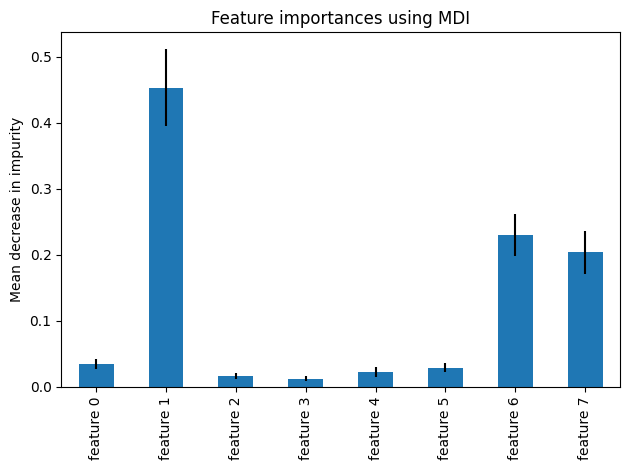

In [509]:
feature_names = [f"feature {i}" for i in range(X_smote.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [510]:
X_smote.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
0,1,67.0,0,1,1,1,228.69,36.600000
1,0,61.0,0,0,1,0,202.21,29.065758
2,1,80.0,0,1,1,0,105.92,32.500000
3,0,49.0,0,0,1,1,171.23,34.400000
4,0,79.0,1,0,1,0,174.12,24.000000


Conclusion: The three features that explain the stroke occurrence are age, avg_glucose_level and bmi